<a href="https://colab.research.google.com/github/StartOnAI/Cerbo/blob/master/docs/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cerbo ML API

This is the Documentation + Code Examples for the ML API from Cerbo.

It consists of the following algorithms:
1.   Decision Trees
2.   Random Forests
3.   KNearestNeighbors
4.   Boosting Algorithms [XGB, Gradient Boosting, AdaBoost]
5.   Stochastic Gradient Descent
6.   Support Vector Machines
7.   Logistic Regression
8.   Regression [Linear, Ridge,  Lasso]

And two useful helper functions
1.   save_model
2.   load_model

To Get Started Just Do:

In [ ]:
!pip install cerbo==0.3.3

## Decision Trees





### Default Constructor
```python
import cerbo.ML as cml
dt = cml.DecisionTree(task, 
                  data, 
                  split=0.3, 
                  max_depths=None,
                  seed=42) 
```


### Parameters
* **task**: String describing if the task is Classification or Regression
* **data**: Dictionary containing features and values for given features
* **split**: Train/Test Split for the data inside dict
* **max_depths**: Maximum Depth the Decision Tree can go to
* **seed**: Value that controls shuffling of data

### Examples

#### Pima Indian Diabetes Dataset

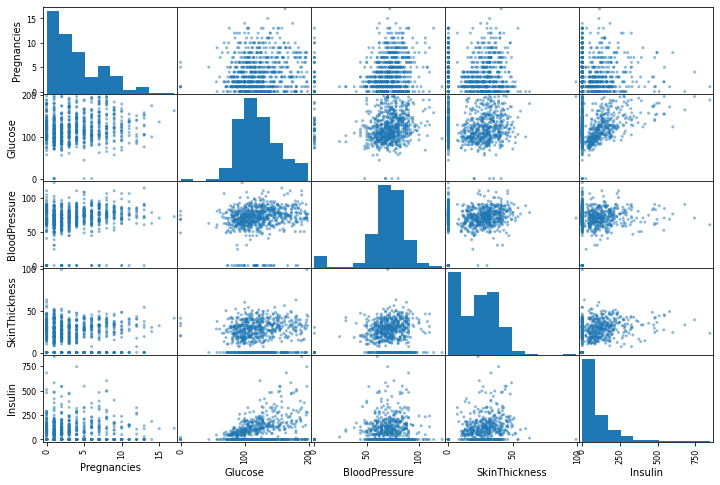

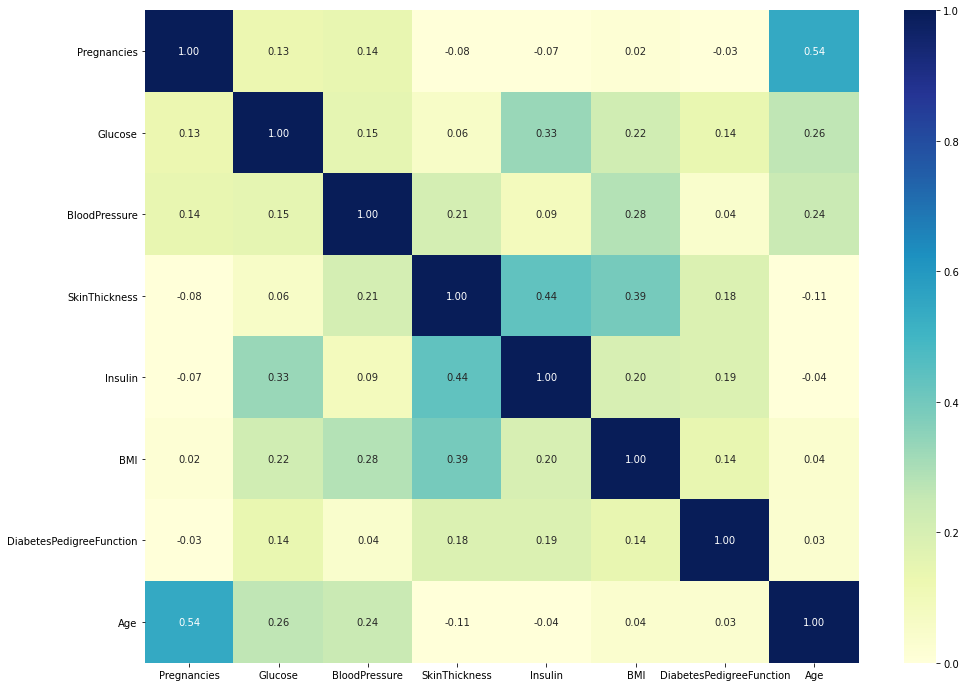

In [ ]:
import cerbo.preprocessing as cp
import cerbo.ML as cml 

loc = "https://raw.githubusercontent.com/StartOnAI/Cerbo/master/examples/data/pima_indians_diabetes.csv"
data, col_names = cp.load_custom_data(loc, "Outcome", num_features=5, id=False)

In [ ]:
# Performance of classification is given in terms of an accuracy score
dt = cml.DecisionTree(task="c", data=data)

Decision Tree Training Accuracy: 100.0%
Decision Tree Testing Accuracy:  70.12987012987013%


#### California Housing Dataset

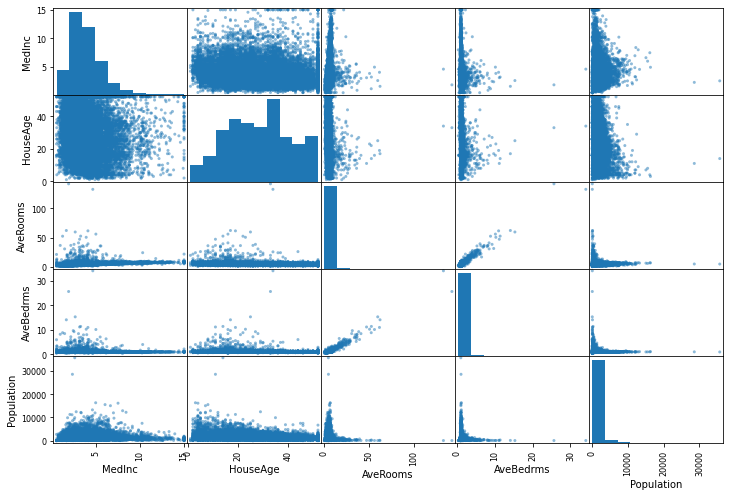

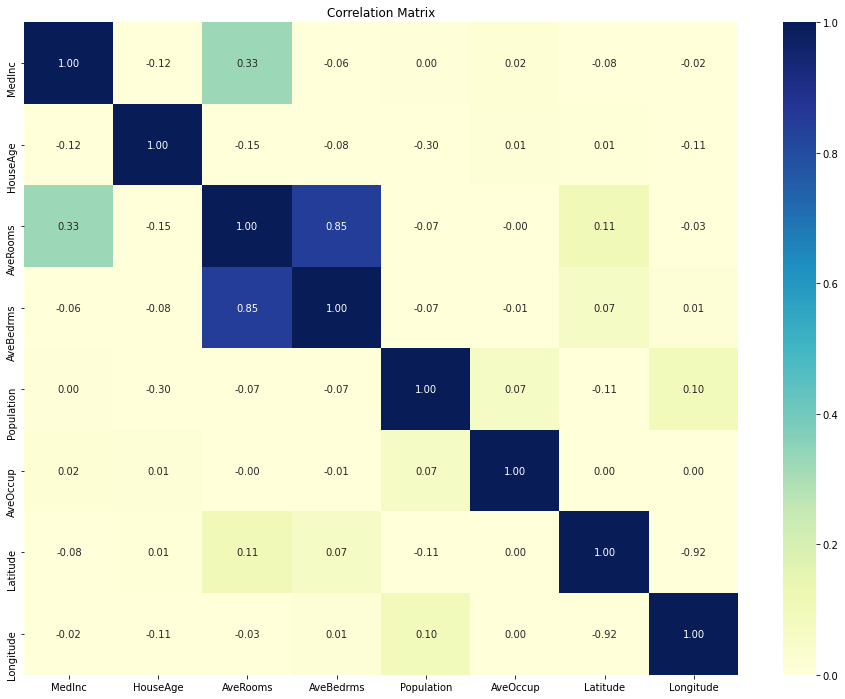

In [ ]:
import cerbo.preprocessing as cp
import cerbo.ML as cml

(X_train, y_train), (X_test, y_test), col_names = cp.load_dataset(name="california_housing")

In [ ]:
data_train = {
    "X": cp.join_arrays(X_train, X_test),
    "y": cp.join_arrays(y_train, y_test)  
}

# Performance of regression given in terms of RMSE
dt = cml.DecisionTree(task="r", data=data)

Decision Tree Training RMSE: 0.0
Decision Tree Testing RMSE: 0.5465357250000211


## Random Forests

### Default Constructor

```python
import cerbo.ML as cml
rf = cml.RandomForest(task,
                      data,
                      split=0.3,
                      n_estimators=100,
                      max_depths=None,
                      seed=42)
```

### Parameters

* **task**: String describing if the task is Classification or Regression
* **data**: Dictionary containing features and values for given features
* **split**: Train/Test Split for the data inside dict
* **n_estimators**: Number of Trees within the Forest
* **max_depths**: Maximum Depth the Random Forest can go to
* **seed**: Value that controls shuffling of data

### Examples

#### Pima Indians Diabetes Dataset

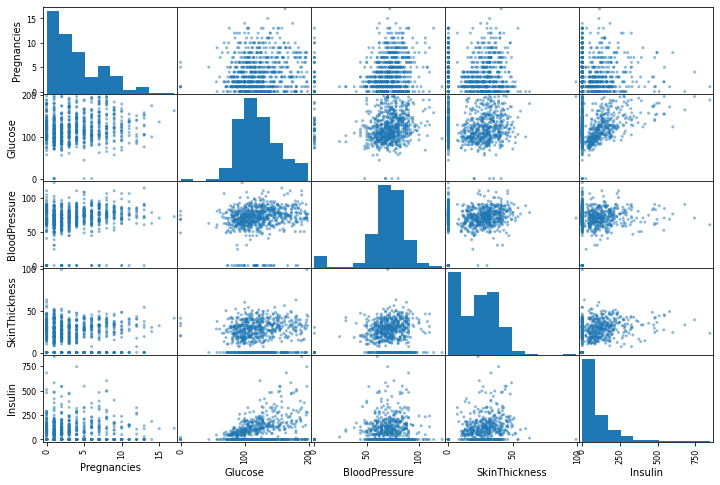

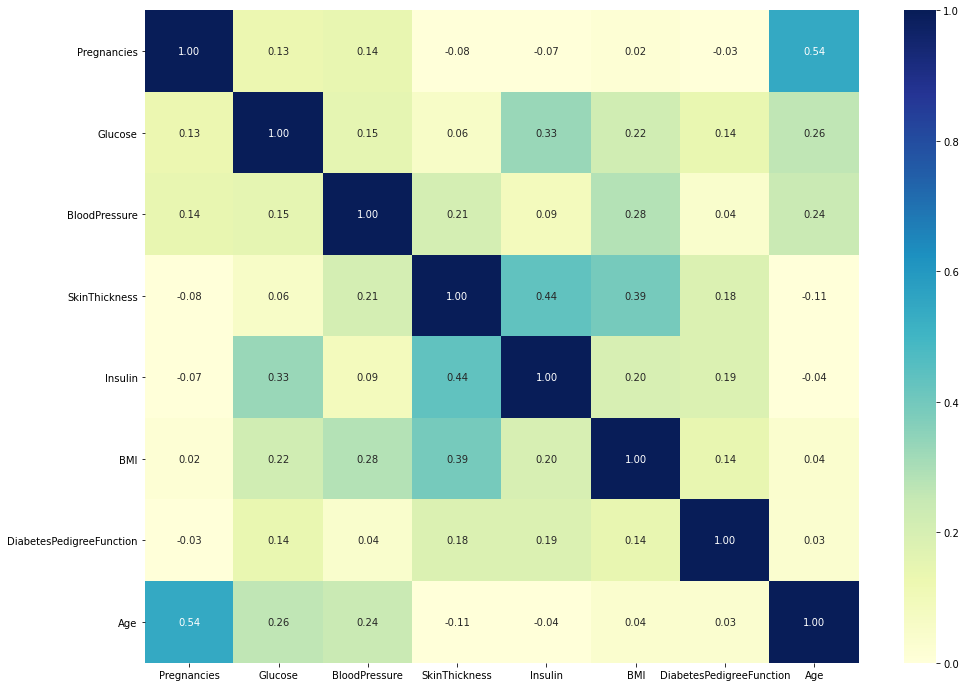

In [ ]:
import cerbo.preprocessing as cp
import cerbo.ML as cml 

loc = "https://raw.githubusercontent.com/StartOnAI/Cerbo/master/examples/data/pima_indians_diabetes.csv"
data, col_names = cp.load_custom_data(loc, "Outcome", num_features=5, id=False)

In [ ]:
# Performance of classification is given in terms of an accuracy score
rf = cml.RandomForest(task="c", data=data)

RandomForest Training Accuracy: 100.0%
RandomForest Testing Accuracy:  75.32467532467533%


#### California Housing Dataset

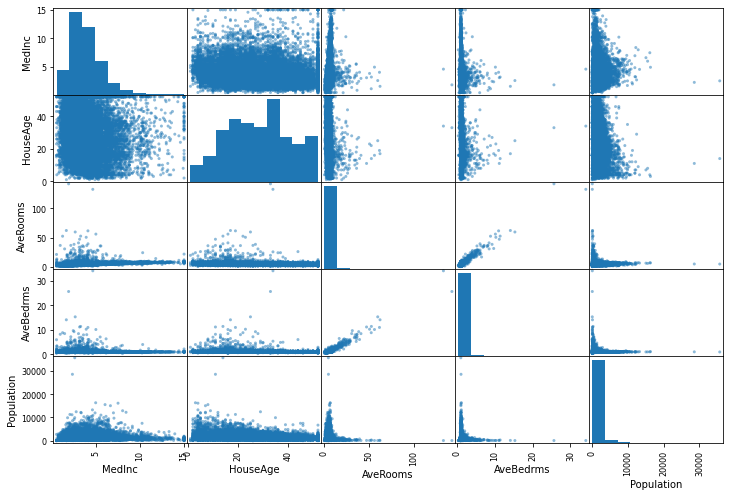

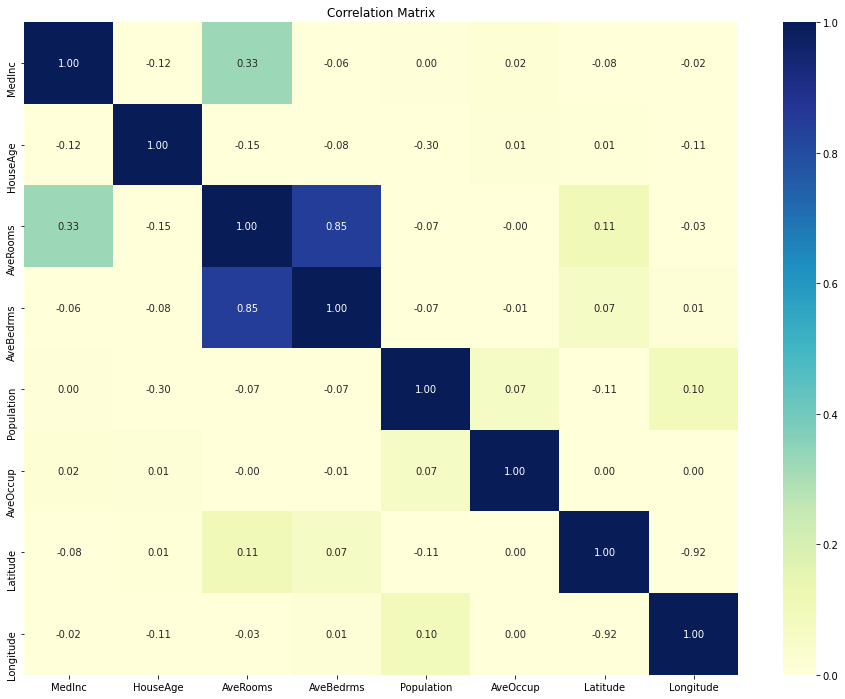

In [ ]:
import cerbo.preprocessing as cp
import cerbo.ML as cml

(X_train, y_train), (X_test, y_test), col_names = cp.load_dataset(name="california_housing")

In [ ]:
data = {
    "X" : cp.join_arrays(X_train, X_test),
    "y" : cp.join_arrays(y_train, y_test)
}

# Performance of regression given in terms of RMSE
rf = cml.RandomForest(task="r", data=data)

RandomForest Training RMSE: 0.18903437932013117
RandomForest Testing RMSE: 0.5091428814175323


## Boosting

### Default Constructor

```python
import cerbo.ML as cml
boost = cml.Boosting(task,
                     data,
                     split=0.3,
                     algo="xgb",
                     n_estimators=75,
                     lr=0.5,
                     seed=42)
```

### Parameters

* **task**: String describing if the task is Classification or Regression
* **data**: Dictionary containing features and values for given features
* **split**: Train/Test Split for the data inside dict
* **algo**: Specific Boosting Algorithm to be used[XGBoost, Gradient Boosting]
* **n_estimators**: Number of Trees within the Forest
* **lr**: The amount the contribution of each tree(n_estimators) is decreased by
* **seed**: Value that controls shuffling of data

### Examples

#### Wisconsin Breast Cancer Dataset

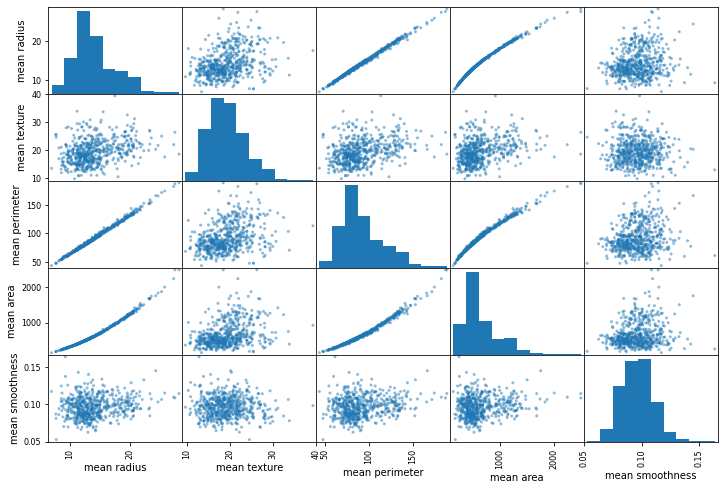

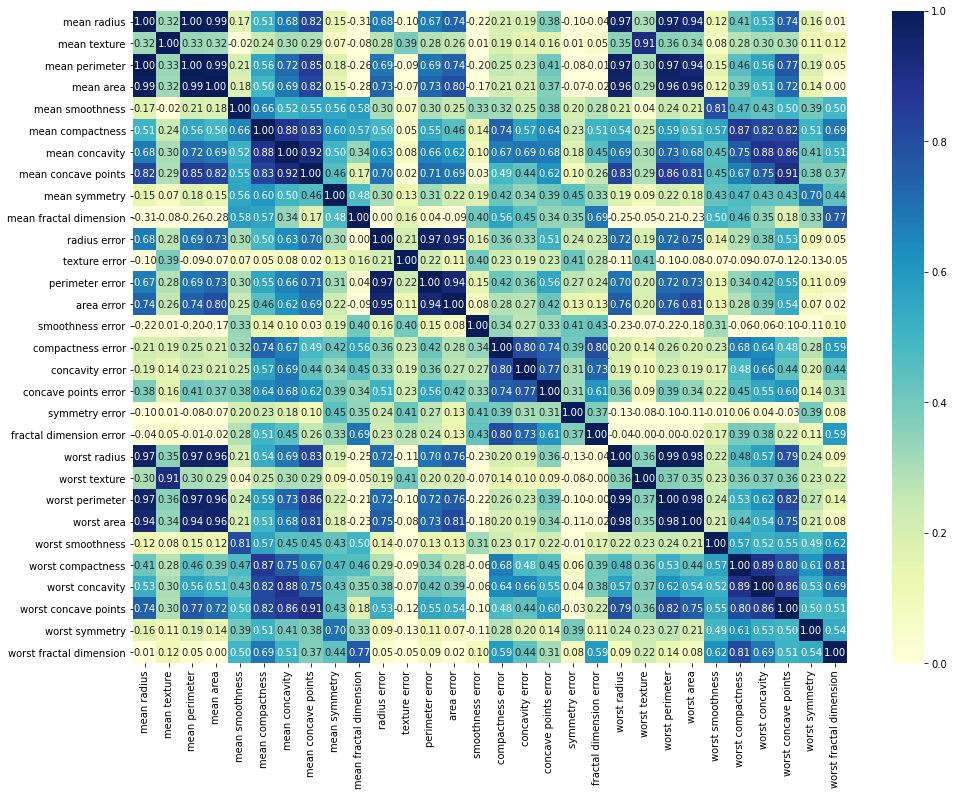

In [ ]:
import cerbo.preprocessing as cp
import cerbo.ML as cml 

(X_train, y_train), (X_test, y_test), col_names = cp.load_dataset(name="breast_cancer")

In [ ]:
data = {
    "X" : cp.join_arrays(X_train, X_test),
    "y" : cp.join_arrays(y_train, y_test)
}



In [ ]:
# Performance of classification is given in terms of an accuracy score
boost = cml.Boosting(task="c", data=data, algo="gb")

Gradient Boosting Training Accuracy: 100.0%
Gradient Boosting Testing Accuracy: 94.73684210526315%


In [ ]:
xgb_boost = cml.Boosting(task="c", data=data, algo="xgb")

XGBoost Training Accuracy: 100.0%
XGBoost Testing Accuracy: 97.6608187134503%


####  California Housing Dataset

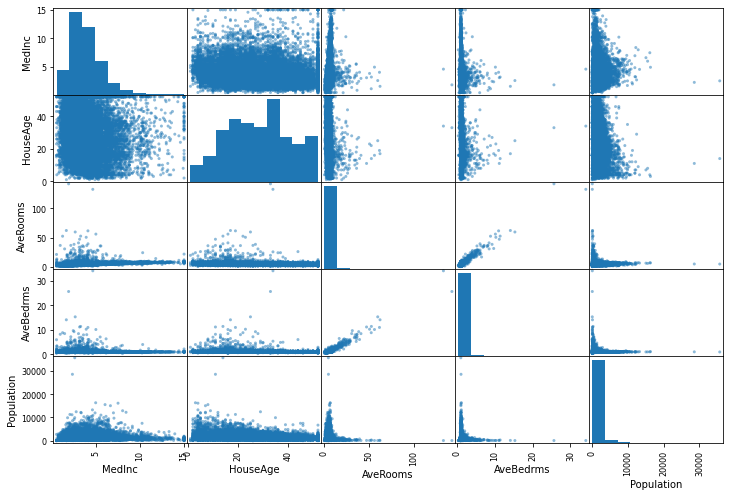

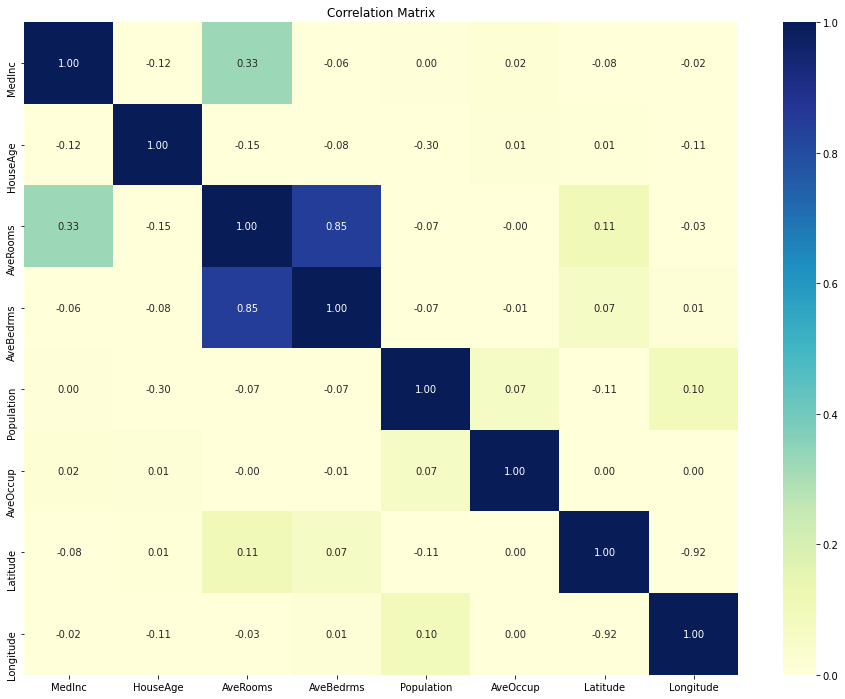

In [ ]:
import cerbo.preprocessing as cp
import cerbo.ML as cml

(X_train, y_train), (X_test, y_test), col_names = cp.load_dataset(name="housing")

In [ ]:
data = {
    "X" : cp.join_arrays(X_train, X_test),
    "y" : cp.join_arrays(y_train, y_test)
}


In [ ]:
# Performance of regression given in terms of RMSE
ada_boost = cml.Boosting(task="r", data=data, algo="ada")

AdaBoost Training RMSE: 0.8196195274390184
AdaBoost Testing RMSE: 0.836512297873565


In [ ]:
gb_boost = cml.Boosting(task="r", data=data, algo="gb")

Gradient Boosting Training RMSE: 0.43081368363707245
Gradient Boosting Testing RMSE: 0.5038181965421421


## KNearestNeighbors

### Default Constructor

```python
import cerbo.ML as cml
knn = cml.KNN(task,
              data,
              split=0.3,
              neighbors=5,
              weights="uniform",
              seed=42)
```

### Parameters

* **task**: String describing if the task is Classification or Regression
* **data**: Dictionary containing features and values for given features
* **split**: Train/Test Split for the data inside dict
* **neighbors**: Number of Neighbors for the KNN Algorithm
* **weights**: Weight Function used in calculating final KNN Prediction
* **seed**: Value that controls shuffling of data

### Examples

#### Wisconsin Breast Cancer Dataset

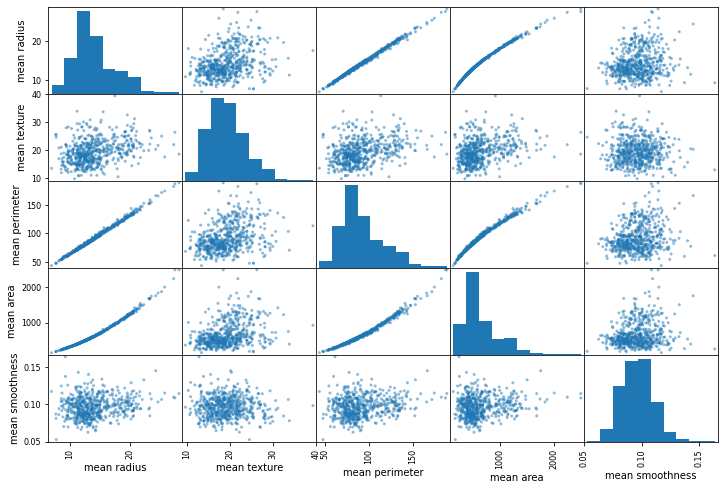

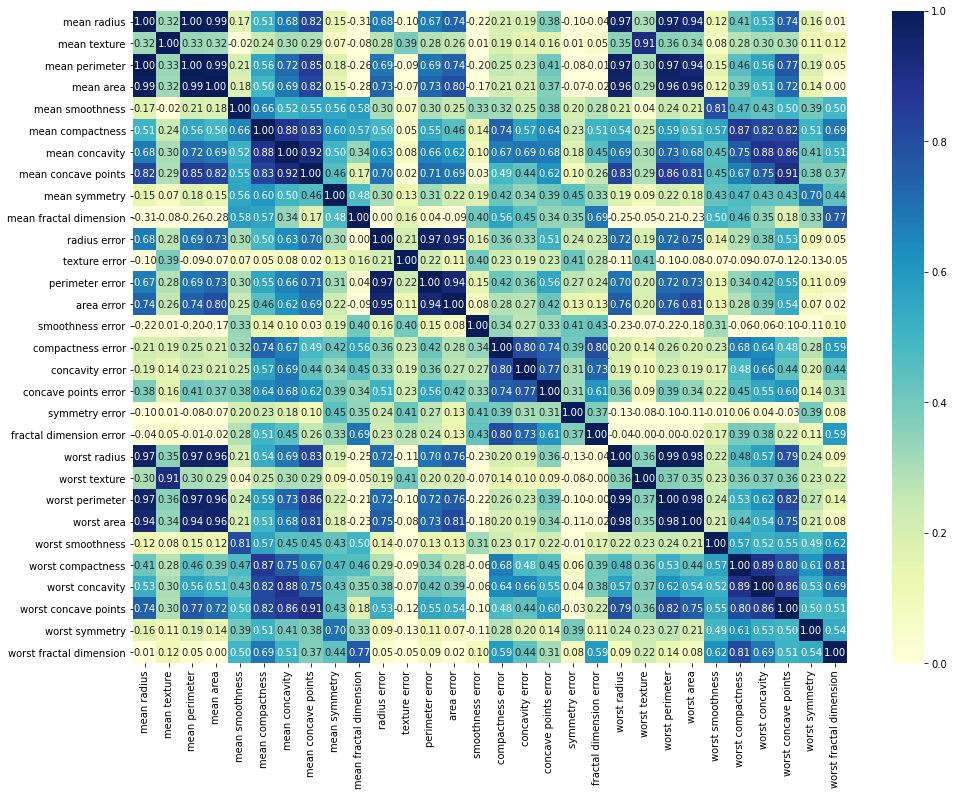

In [ ]:
import cerbo.preprocessing as cp
import cerbo.ML as cml 

(X_train, y_train), (X_test, y_test), col_names = cp.load_dataset(name="breast_cancer")

In [ ]:
data = {
    "X" : cp.join_arrays(X_train, X_test),
    "y" : cp.join_arrays(y_train, y_test)
}

# Performance of classification is given in terms of an accuracy score
knn = cml.KNN(task="c", data=data, neighbors=2)

KNN Training Accuracy: 97.23618090452261%
KNN Testing Accuracy: 89.47368421052632%


####  California Housing Dataset

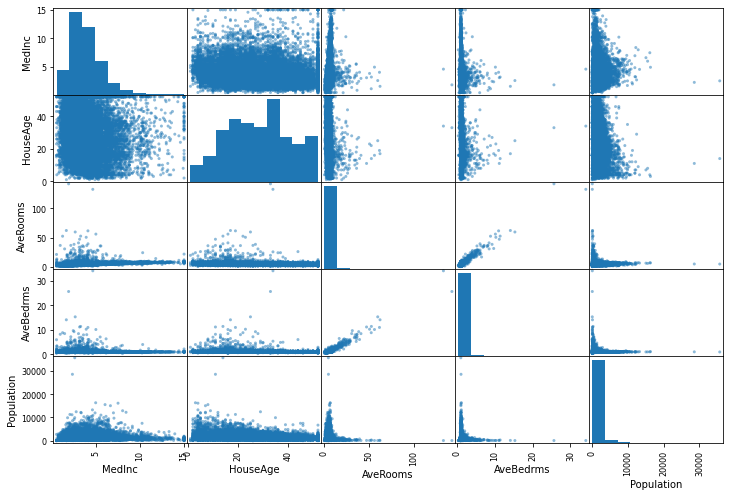

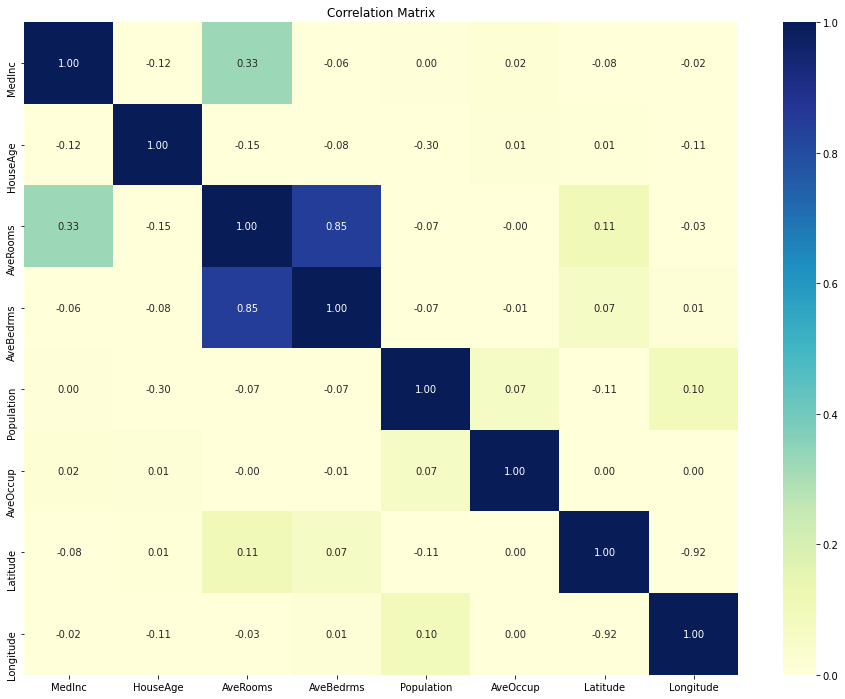

In [ ]:
import cerbo.preprocessing as cp
import cerbo.ML as cml

(X_train, y_train), (X_test, y_test), col_names = cp.load_dataset(name="california_housing")

In [ ]:
data = {
    "X" : cp.join_arrays(X_train, X_test),
    "y" : cp.join_arrays(y_train, y_test)
}

# Performance of regression given in terms of RMSE
knn = cml.KNN(task="r", data=data)

KNN Training RMSE: 0.8617395064764274
KNN Testing RMSE: 1.074423425980363


## Stochastic Gradient Descent

### Default Constructor

```python
import cerbo.ML as cml
sgd = cml.SGD(task,
              data,
              split=0.3,
              alpha=0.0001,
              seed=42)
```

### Parameters

* **task**: String describing if the task is Classification or Regression
* **data**: Dictionary containing features and values for given features
* **split**: Train/Test Split for the data inside dict
* **alpha**: Constant that multiplies the regularization term
* **seed**: Value that controls shuffling of data

### Examples

#### Pima Indians Diabetes Dataset

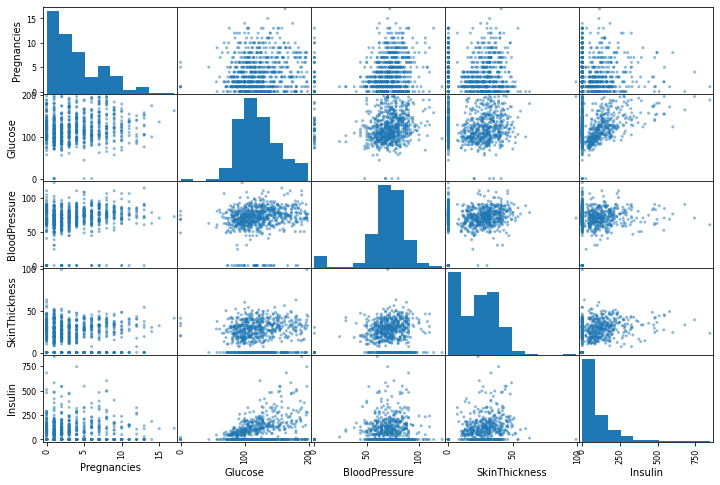

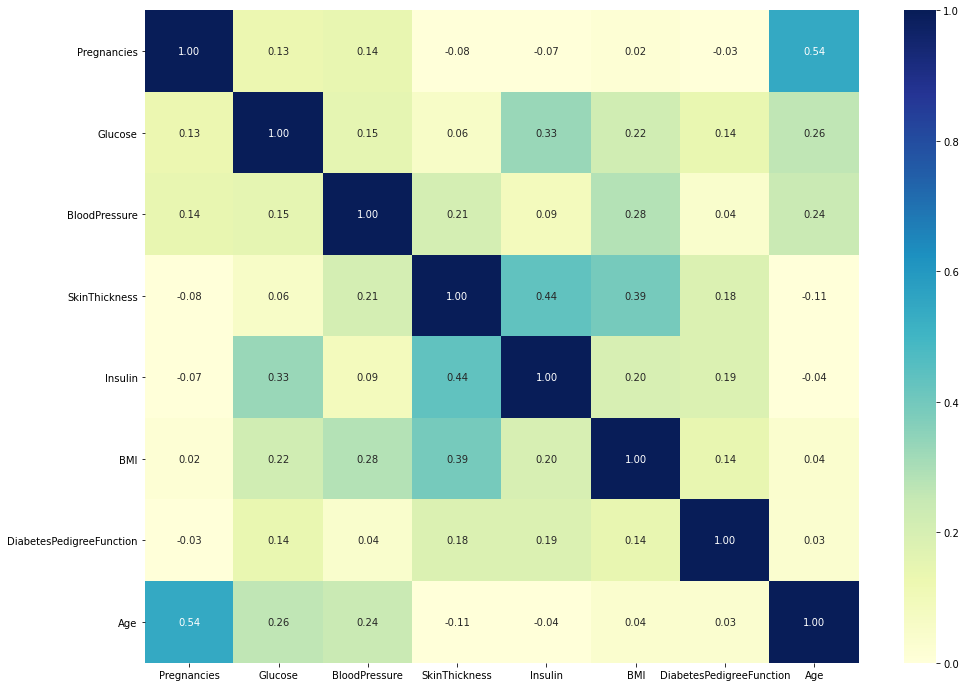

In [ ]:
import cerbo.preprocessing as cp
import cerbo.ML as cml 

loc = "https://raw.githubusercontent.com/StartOnAI/Cerbo/master/examples/data/pima_indians_diabetes.csv"
data, col_names = cp.load_custom_data(loc, "Outcome", num_features=5, id=False)

In [ ]:
sgd = cml.SGD(task="c", data=data)

SGD Training Accuracy: 59.217877094972074%
SGD Testing Accuracy: 59.74025974025974%


####  California Housing Dataset

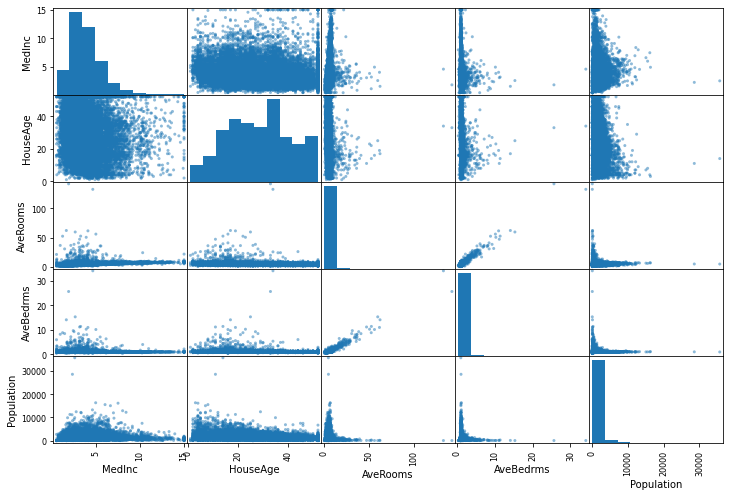

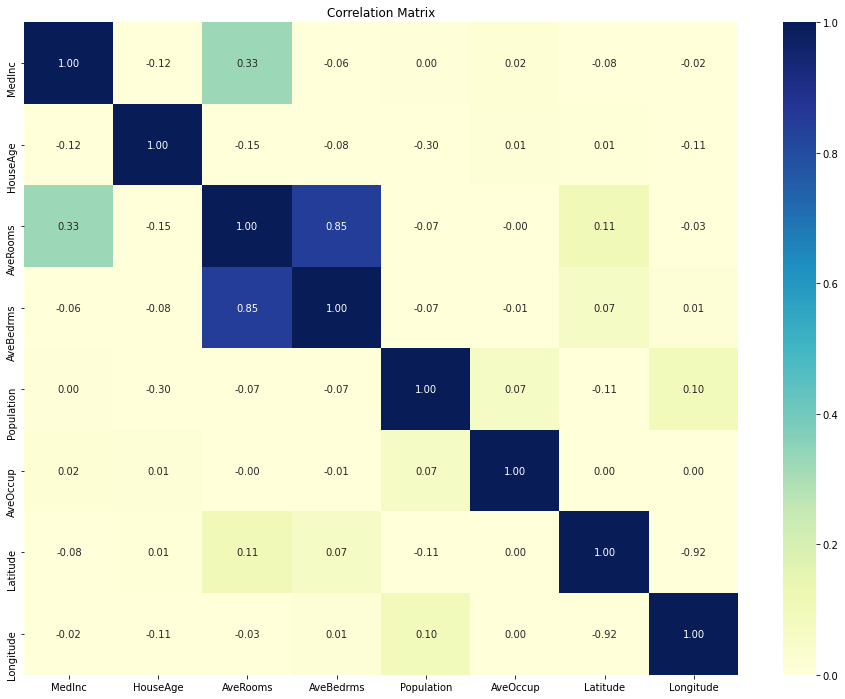

In [ ]:
import cerbo.preprocessing as cp
import cerbo.ML as cml

(X_train, y_train), (X_test, y_test), col_names = cp.load_dataset(name="california_housing")

In [ ]:
data = {
    "X" : cp.join_arrays(X_train, X_test),
    "y" : cp.join_arrays(y_train, y_test)
}

# Performance of regression given in terms of RMSE
sgd = cml.SGD(task="r", data=data, alpha=0.0000000001)

SGD Training RMSE: 539202367664484.3
SGD Testing RMSE: 549825376496722.75


## Support Vector Machines

### Default Constructor

```python
import cerbo.ML as cml
svm = cml.SVM(task,
              data,
              split=0.3,
              C=1,
              seed=42)
```

### Parameters

* **task**: String describing if the task is Classification or Regression
* **data**: Dictionary containing features and values for given features
* **split**: Train/Test Split for the data inside dict
* **C**: Regularization Parameter
* **seed**: Value that controls shuffling of data

### Examples

#### Wisconsin Breast Cancer Dataset

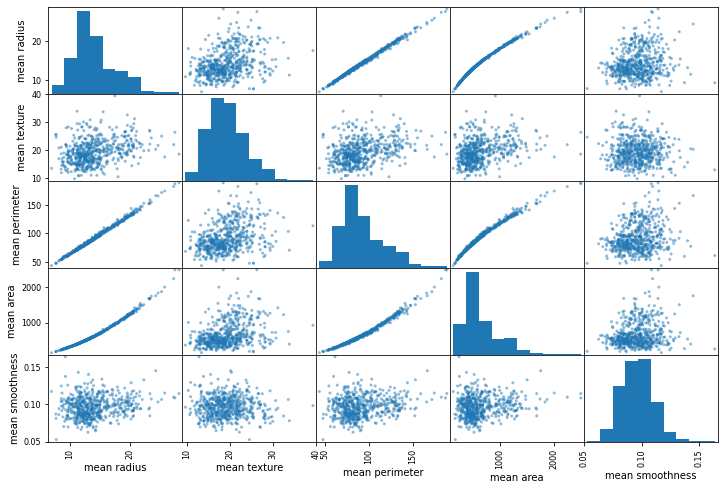

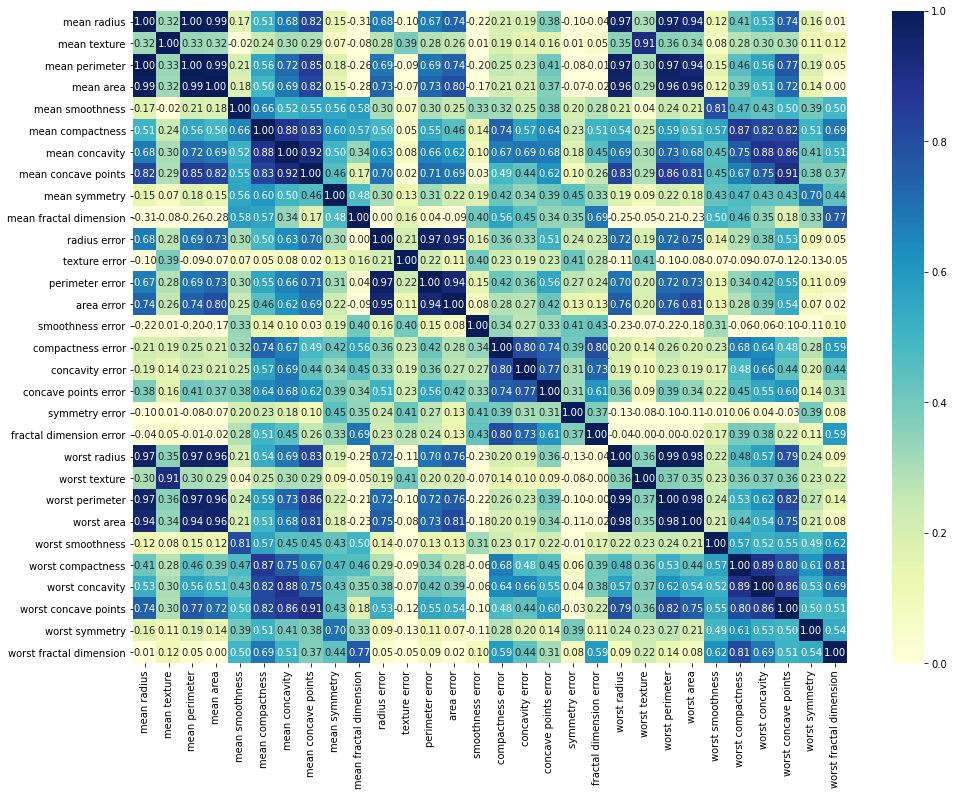

In [ ]:
import cerbo.preprocessing as cp
import cerbo.ML as cml 

(X_train, y_train), (X_test, y_test), col_names = cp.load_dataset(name="breast_cancer")

In [ ]:
data = {
    "X" : cp.join_arrays(X_train, X_test),
    "y" : cp.join_arrays(y_train, y_test)
}

# Performance of classification is given in terms of an accuracy score
svm = cml.SVM(task="c", data=data)

Support Vector Machines Training Accuracy: 92.21105527638191%
Support Vector Machines Testing Accuracy: 91.81286549707602%


####  California Housing Dataset

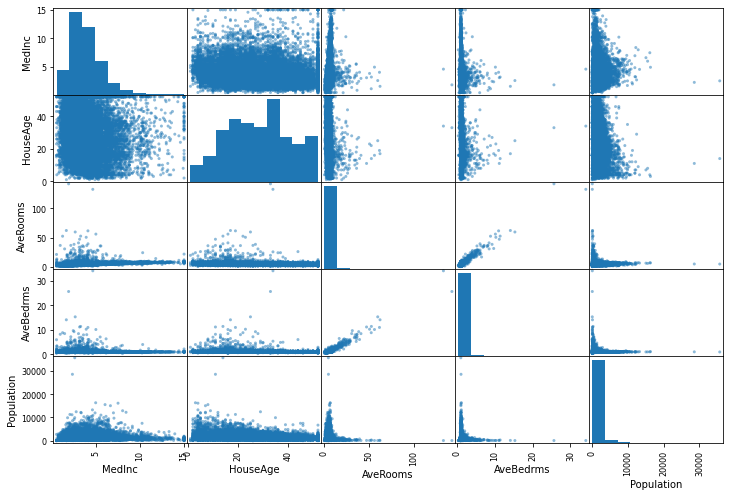

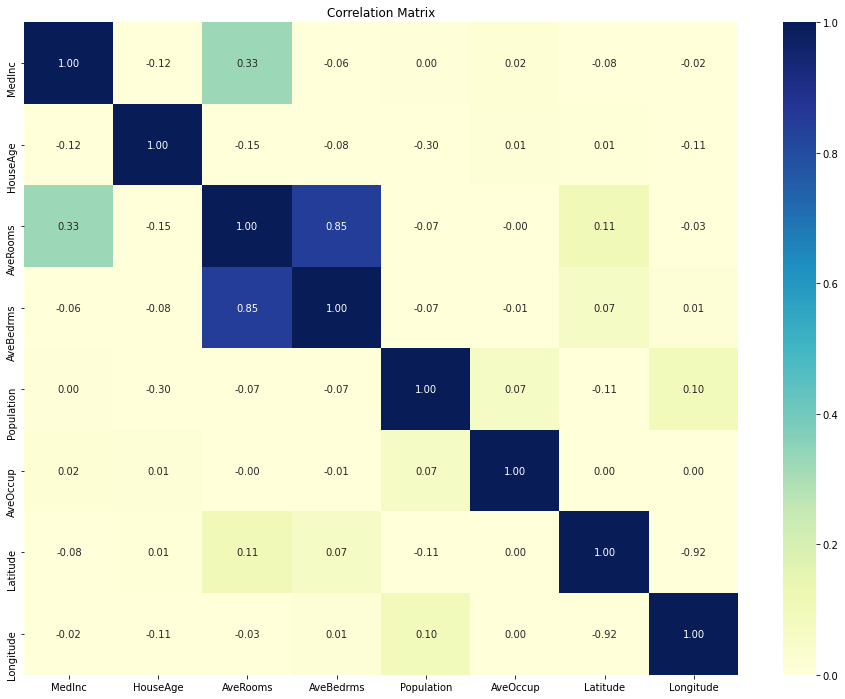

In [ ]:
import cerbo.preprocessing as cp
import cerbo.ML as cml

(X_train, y_train), (X_test, y_test), col_names = cp.load_dataset(name="california_housing")

In [ ]:
data = {
    "X" : cp.join_arrays(X_train, X_test),
    "y" : cp.join_arrays(y_train, y_test)
}

# Performance of regression given in terms of RMSE
svm = cml.SVM(task="r", data=data)

Support Vector Machines Training RMSE: 1.1621597788502354
Support Vector Machines Testing RMSE: 1.1744578154109


## Logistic Regression

### Default Constructor

```python
import cerbo.ML as cml
logistic_reg = cml.LogisticReg(data,
                               split=0.3,
                               solver="lbfgs,
                               seed=42)
```

### Parameters

* **data**: Dictionary containing features and values for given features
* **split**: Train/Test Split for the data inside dict
* **solver**: Algorithm used for Optimization problem for Log. Reg
* **seed**: Value that controls shuffling of data

### Examples

#### Wisconsin Breast Cancer Dataset

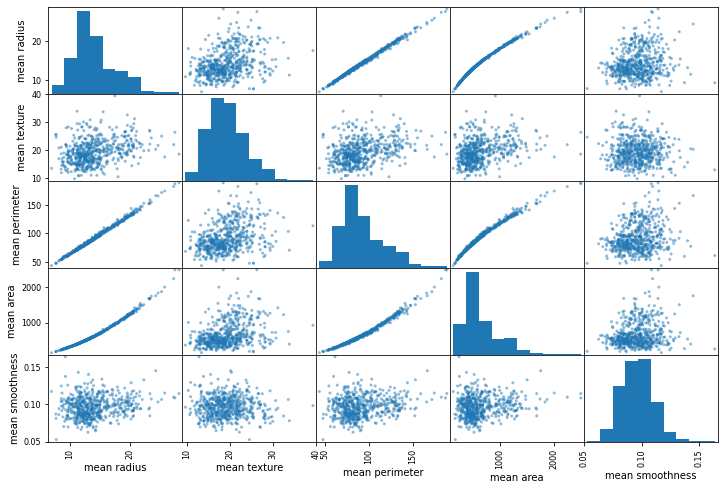

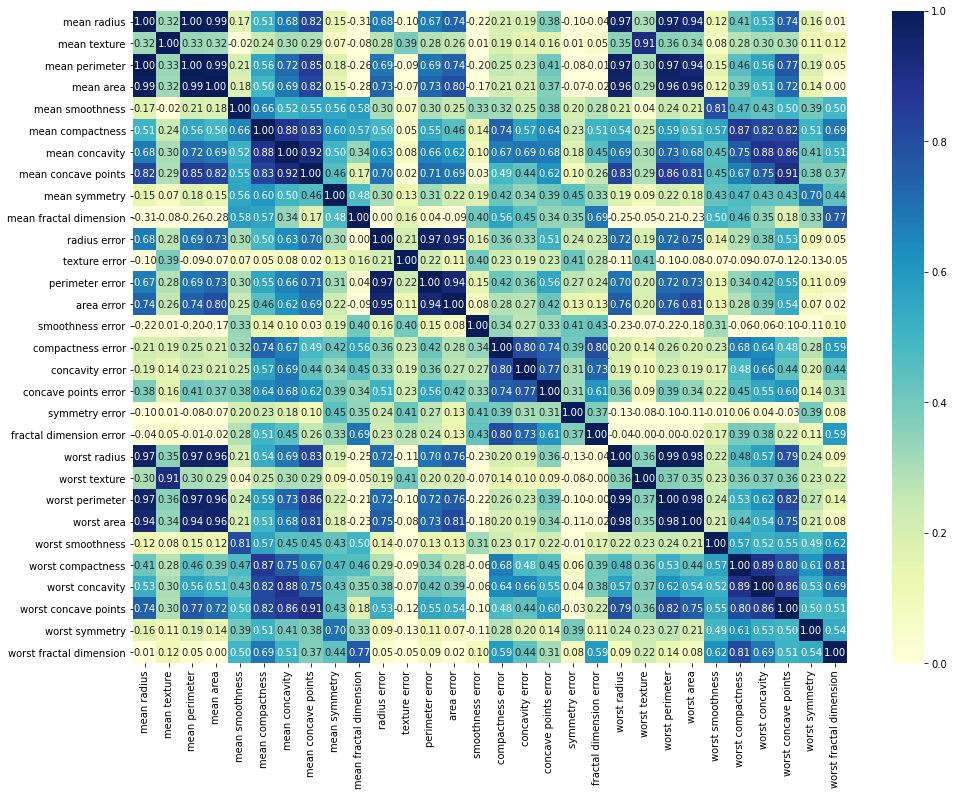

In [ ]:
import cerbo.preprocessing as cp
import cerbo.ML as cml 

(X_train, y_train), (X_test, y_test), col_names = cp.load_dataset(name="breast_cancer")

In [ ]:
data = {
    "X" : cp.join_arrays(X_train, X_test),
    "y" : cp.join_arrays(y_train, y_test)
}

# Performance of classification is given in terms of an accuracy score
logistic_reg = cml.LogisticReg(data=data)

Logistic Regression Training Accuracy: 95.22613065326632%
Logistic Regression Testing Accuracy: 94.73684210526315%


## Regression

### Default Constructor

```python
import cerbo.ML as cml
regression = cml.Regression(data,
                            split=0.3,
                            task="linear",
                            seed=42)
```

### Parameters

* **data**: Dictionary containing features and values for given features
* **split**: Train/Test Split for the data inside dict
* **task**: Variable so you can choose between different types of Regression
* **seed**: Value that controls shuffling of data

### Examples

####  California Housing Dataset

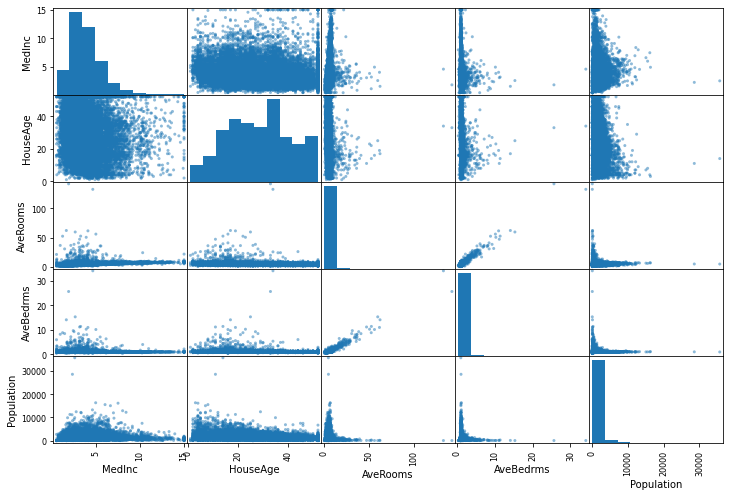

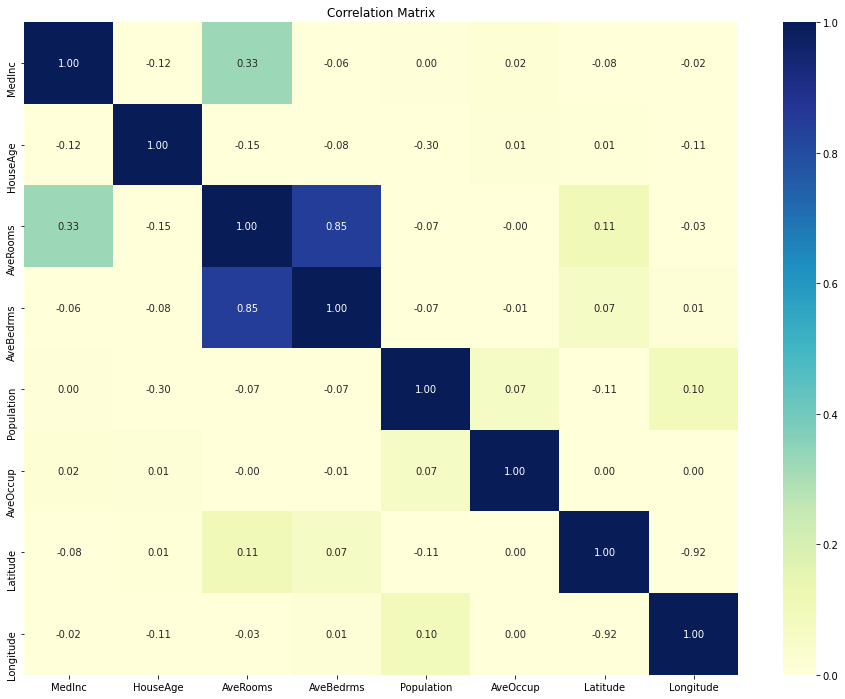

In [ ]:
import cerbo.preprocessing as cp
import cerbo.ML as cml

(X_train, y_train), (X_test, y_test), col_names = cp.load_dataset(name="california_housing")

In [ ]:
data = {
    "X" : cp.join_arrays(X_train, X_test),
    "y" : cp.join_arrays(y_train, y_test)
}

# Performance of regression given in terms of RMSE
linear_reg = cml.Regression(data=data)

Linear Regression Training RMSE: 0.7238650067642605
Linear Regression Testing RMSE: 0.72488609091324


In [ ]:
lasso_reg = cml.Regression(data=data, task="lasso")

Lasso Regression Training RMSE: 0.9806907689500596
Lasso Regression Testing RMSE: 0.9841595835946763
